# Skeleton creation

In [42]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation, PillowWriter
import plotly.graph_objects as go
from scipy.spatial.transform import Rotation
from numpy import radians, cos, sin, array
from scipy import signal
from sklearn.decomposition import PCA
import moviepy.editor as mp


In [43]:
from __future__ import print_function
from ipywidgets import interact, fixed
import ipywidgets as widgets

import cycler
import matplotlib as mpl
n = 100
color = plt.cm.viridis(np.linspace(0, 1,n))
mpl.rcParams['axes.prop_cycle'] = cycler.cycler('color', color)

In [44]:

import matplotlib.animation as animation

from matplotlib.animation import FuncAnimation

In [45]:

# define 3-D points in GCS
#Head
def make_body_vector_pairs(df):
  points = {}
  points['REYE'] = np.array([df['Right eye_x'], df['Right eye_y']])
  points['LEYE'] = np.array([df['Left eye_x'],  df['Left eye_y']])
  points['NOSE'] = np.array([df['Nose_x'],      df['Nose_y']])

  #Upper Body
  points['STERNUM']       = np.array([df['Sternum_x'],                   df['Sternum_y']])
  points['RSHOULDER']     = np.array([df['Rt shoulder_x'],               df['Rt shoulder_y']])
  points['LSHOULDER']     = np.array([df['Lt shoulder_x'],               df['Lt shoulder_y']])
  points['RELBOW']        = np.array([df['Rt elbow_x'],                  df['Rt elbow_y']])
  points['LELBOW']        = np.array([df['Lt elbow_x'],                  df['Lt elbow_y']])
  points['RWRIST']        = np.array([df['Rt wrist_x'],                  df['Rt wrist_y']])
  points['LWRIST']        = np.array([df['Lt wrist_x'],                  df['Lt wrist_y']])
  points['RINDEXFINGER']  = np.array([df['Rt hand index finger MCP_x'],  df['Rt hand index finger MCP_y']])
  points['LINDEXFINGER']  = np.array([df['Lt hand index finger MCP_x'],  df['Lt hand index finger MCP_y']])
  points['RLITTLEFINGER'] = np.array([df['Rt hand little finger MCP_x'], df['Rt hand little finger MCP_y']])
  points['LLITTLEFINGER'] = np.array([df['Lt hand little finger MCP_x'], df['Lt hand little finger MCP_y']])

  points['RMIDHAND'] = 0.5 * (points['RINDEXFINGER'] + points['RLITTLEFINGER'])
  points['LMIDHAND'] = 0.5 * (points['LINDEXFINGER'] + points['LLITTLEFINGER'])

  #Lower Body
  points['RHIP']        = np.array([df['Rt ASIS_x'],       df['Rt ASIS_y']])
  points['LHIP']        = np.array([df['Lt ASIS_x'],       df['Lt ASIS_y']])
  points['RKNEE']       = np.array([df['Rt knee_x'],       df['Rt knee_y']])
  points['LKNEE']       = np.array([df['Lt knee_x'],       df['Lt knee_y']])
  points['RANKLE']      = np.array([df['Rt ankle_x'],      df['Rt ankle_y']])
  points['LANKLE']      = np.array([df['Lt ankle_x'],      df['Lt ankle_y']])
  points['RBIGTOE']     = np.array([df['Rt big toe_x'],    df['Rt big toe_y']])
  points['LBIGTOE']     = np.array([df['Lt big toe_x'],    df['Lt big toe_y']])
  points['RLITTLETOE']  = np.array([df['Rt little toe_x'], df['Rt little toe_y']])
  points['LLITTLETOE']  = np.array([df['Lt little toe_x'], df['Lt little toe_y']])

  points['RMIDFOOT']    = 0.5 * (points['RBIGTOE'] + points['RLITTLETOE'])
  points['LMIDFOOT']    = 0.5 * (points['LBIGTOE'] + points['LLITTLETOE'])
  return(points)

def define_segment_vectors(points):
  segments = {}
  segments['RUpperArm'] = points['RELBOW']     - points['RSHOULDER']
  segments['LUpperArm'] = points['LELBOW']     - points['LSHOULDER']
  segments['RForearm']  = points['RWRIST']     - points['RELBOW']
  segments['LForearm']  = points['LWRIST']     - points['LELBOW']
  segments['RHand']     = (points['RMIDHAND']) - (points['RWRIST'])
  segments['LHand']     = (points['LMIDHAND']) - (points['LWRIST'])
  segments['RTrunk']    = (points['RHIP'])     - (points['RSHOULDER'])
  segments['LTrunk']    = (points['LHIP'])     - (points['LSHOULDER'])

  #Lower Body
  segments['RThigh']    = (points['RKNEE'])    - (points['RHIP'])
  segments['LThigh']    = (points['LKNEE'])    - (points['LHIP'])
  segments['RShank']    = (points['RANKLE'])   - (points['RKNEE'])
  segments['LShank']    = (points['LANKLE'])   - (points['LKNEE'])
  segments['RFoot']     = (points['RMIDFOOT']) - (points['RANKLE'])
  segments['LFoot']     = (points['LMIDFOOT']) - (points['LANKLE'])
  return(segments)

In [46]:
def construct_skeleton(points):
  # define our 'paths'
  paths = {}
  paths['HEAD_X']    = np.array([points['NOSE'][0], points['LEYE'][0], points['REYE'][0], points['NOSE'][0]])
  paths['HEAD_Y']    = np.array([points['NOSE'][1], points['LEYE'][1], points['REYE'][1], points['NOSE'][1]])

  paths['L_ARM_X'] = np.array([points['LSHOULDER'][0], points['LELBOW'][0], points['LWRIST'][0], points['LINDEXFINGER'][0], points['LLITTLEFINGER'][0], points['LWRIST'][0]])
  paths['L_ARM_Y'] = np.array([points['LSHOULDER'][1], points['LELBOW'][1], points['LWRIST'][1], points['LINDEXFINGER'][1], points['LLITTLEFINGER'][1], points['LWRIST'][1]])

  paths['R_ARM_X'] = np.array([points['RSHOULDER'][0], points['RELBOW'][0], points['RWRIST'][0], points['RINDEXFINGER'][0], points['RLITTLEFINGER'][0], points['RWRIST'][0]])
  paths['R_ARM_Y'] = np.array([points['RSHOULDER'][1], points['RELBOW'][1], points['RWRIST'][1], points['RINDEXFINGER'][1], points['RLITTLEFINGER'][1], points['RWRIST'][1]])

  paths['TORSO_X'] = np.array([points['RSHOULDER'][0], points['STERNUM'][0], points['RSHOULDER'][0], points['RHIP'][0], points['STERNUM'][0], points['RHIP'][0], points['LHIP'][0], points['STERNUM'][0], points['LHIP'][0], points['LSHOULDER'][0], points['STERNUM'][0], points['LSHOULDER'][0], points['RSHOULDER'][0]])
  paths['TORSO_Y'] = np.array([points['RSHOULDER'][1], points['STERNUM'][1], points['RSHOULDER'][1], points['RHIP'][1], points['STERNUM'][1], points['RHIP'][1], points['LHIP'][1], points['STERNUM'][1], points['LHIP'][1], points['LSHOULDER'][1], points['STERNUM'][1], points['LSHOULDER'][1], points['RSHOULDER'][1]])

  paths['L_LEG_X'] = np.array([points['LHIP'][0], points['LKNEE'][0], points['LANKLE'][0], points['LBIGTOE'][0], points['LLITTLETOE'][0], points['LANKLE'][0]])
  paths['L_LEG_Y'] = np.array([points['LHIP'][1], points['LKNEE'][1], points['LANKLE'][1], points['LBIGTOE'][1], points['LLITTLETOE'][1], points['LANKLE'][1]])

  paths['R_LEG_X'] = np.array([points['RHIP'][0], points['RKNEE'][0], points['RANKLE'][0], points['RBIGTOE'][0], points['RLITTLETOE'][0], points['RANKLE'][0]])
  paths['R_LEG_Y'] = np.array([points['RHIP'][1], points['RKNEE'][1], points['RANKLE'][1], points['RBIGTOE'][1], points['RLITTLETOE'][1], points['RANKLE'][1]])

  return paths

In [47]:

def plot_skeleton(skeleton, frame):
  fig, ax = plt.subplots(1,1, subplot_kw={'aspect':1}, figsize=(19.2,10.8))
  ax.plot(skeleton['HEAD_X'][:,frame], skeleton['HEAD_Y'][:,frame], 'o-', alpha=0.5)
  ax.plot(skeleton['R_ARM_X'][:,frame], skeleton['R_ARM_Y'][:,frame], 'o-', alpha=0.5)
  ax.plot(skeleton['L_ARM_X'][:,frame], skeleton['L_ARM_Y'][:,frame], 'o-', alpha=0.5)
  ax.plot(skeleton['TORSO_X'][:,frame], skeleton['TORSO_Y'][:,frame], 'o-', alpha=0.5)
  ax.plot(skeleton['L_LEG_X'][:,frame], skeleton['L_LEG_Y'][:,frame], 'o-', alpha=0.5)
  ax.plot(skeleton['R_LEG_X'][:,frame], skeleton['R_LEG_Y'][:,frame], 'o-', alpha=0.5)
  ax.set_xlim(250,1500)
  ax.set_ylim(0,1200)
  ax.invert_yaxis()

In [48]:

#Calculate Segment Angles
def calculate_segment_angles(segments):
  segment_thetas = {}
  for k, v in segments.items():
    segment_thetas[k] = np.arctan2(segments[k][1], segments[k][0])
  return(segment_thetas)

In [49]:

#unwrap segment angles
def unwrap_segment_thetas(segment_thetas):
  unwrapped_segment_thetas = {}
  for k, v in segment_thetas.items():
    unwrapped_segment_thetas[k] = np.unwrap(segment_thetas[k], period=2*np.pi)
  return(unwrapped_segment_thetas)

In [50]:
 def calculate_joint_thetas(unwrapped_segment_thetas):

  joint_thetas = {}

  joint_thetas['RShoulder'] = unwrapped_segment_thetas['RUpperArm'] - unwrapped_segment_thetas['RTrunk']
  joint_thetas['RElbow'] = -unwrapped_segment_thetas['RForearm'] - (np.pi - unwrapped_segment_thetas['RUpperArm'])
  joint_thetas['RWrist'] = unwrapped_segment_thetas['RHand'] + (np.pi-unwrapped_segment_thetas['RForearm'])
  joint_thetas['RHip'] = unwrapped_segment_thetas['RThigh'] - unwrapped_segment_thetas['RTrunk']
  joint_thetas['RKnee'] = unwrapped_segment_thetas['RThigh'] - unwrapped_segment_thetas['RShank']
  joint_thetas['RAnkle'] = unwrapped_segment_thetas['RFoot'] - unwrapped_segment_thetas['RShank']

  joint_thetas['LShoulder'] = unwrapped_segment_thetas['LTrunk'] - unwrapped_segment_thetas['LUpperArm']
  joint_thetas['LElbow'] = unwrapped_segment_thetas['LUpperArm'] + unwrapped_segment_thetas['LForearm']
  joint_thetas['LWrist'] = np.pi - unwrapped_segment_thetas['LForearm'] + unwrapped_segment_thetas['LHand']
  joint_thetas['LHip'] = unwrapped_segment_thetas['LTrunk'] - unwrapped_segment_thetas['LThigh']
  joint_thetas['LKnee'] = unwrapped_segment_thetas['LShank'] - unwrapped_segment_thetas['LThigh']
  joint_thetas['LAnkle'] = unwrapped_segment_thetas['LFoot'] - unwrapped_segment_thetas['LShank']

  return(joint_thetas)

In [51]:

def process_baby(filename):
  df = pd.read_csv(filename)
  points = make_body_vector_pairs(df)
  segments = define_segment_vectors(points)
  paths = construct_skeleton(points)
  segment_thetas = calculate_segment_angles(segments)
  unwrapped_segment_thetas = unwrap_segment_thetas(segment_thetas)
  joint_thetas = calculate_joint_thetas(unwrapped_segment_thetas)
  return(points, segments, paths, segment_thetas, unwrapped_segment_thetas, joint_thetas)

## Put your link here


In [52]:

points_88on11_edited, segments_88on11_edited, paths_88on11_edited, segment_thetas_88on11_edited, unwrapped_segment_thetas_88on11_edited, joint_thetas_88on11_edited = process_baby('Output_88on5_2_Interpolated_edges_feet_hand_solved.csv')

MovieWriter ffmeg unavailable; using Pillow instead.


IndexError: index 1498 is out of bounds for axis 1 with size 1498

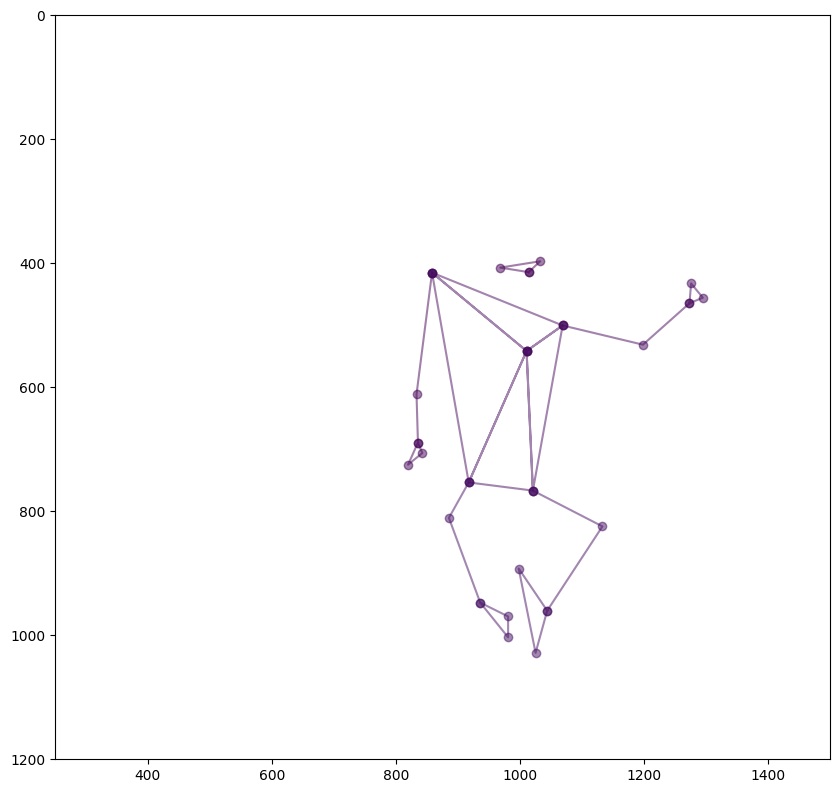

In [53]:

fig, ax = plt.subplots(1,1, subplot_kw={'aspect':1}, figsize=(10,10))
skeleton = paths_88on11_edited
Head_line,  = ax.plot(skeleton['HEAD_X'][:,0], skeleton['HEAD_Y'][:,0], 'o-', alpha=0.5)
Rarm_line,  = ax.plot(skeleton['R_ARM_X'][:,0], skeleton['R_ARM_Y'][:,0], 'o-', alpha=0.5)
Larm_line,  = ax.plot(skeleton['L_ARM_X'][:,0], skeleton['L_ARM_Y'][:,0], 'o-', alpha=0.5)
torso_line, = ax.plot(skeleton['TORSO_X'][:,0], skeleton['TORSO_Y'][:,0], 'o-', alpha=0.5)
Lleg_line,  = ax.plot(skeleton['L_LEG_X'][:,0], skeleton['L_LEG_Y'][:,0], 'o-', alpha=0.5)
Rleg_line,  = ax.plot(skeleton['R_LEG_X'][:,0], skeleton['R_LEG_Y'][:,0], 'o-', alpha=0.5)
ax.set_xlim(250,1500)
ax.set_ylim(0,1200)
ax.invert_yaxis()

def animate(frame):
  Head_line.set_data(skeleton['HEAD_X'][:,frame], skeleton['HEAD_Y'][:,frame])
  Rarm_line.set_data(skeleton['R_ARM_X'][:,frame], skeleton['R_ARM_Y'][:,frame])
  Larm_line.set_data(skeleton['L_ARM_X'][:,frame], skeleton['L_ARM_Y'][:,frame])
  torso_line.set_data(skeleton['TORSO_X'][:,frame], skeleton['TORSO_Y'][:,frame])
  Lleg_line.set_data(skeleton['L_LEG_X'][:,frame], skeleton['L_LEG_Y'][:,frame])
  Rleg_line.set_data(skeleton['R_LEG_X'][:,frame], skeleton['R_LEG_Y'][:,frame])
  return Head_line, Rarm_line, Larm_line, torso_line, Lleg_line, Rleg_line

animation = FuncAnimation(fig, animate, frames=1525, interval=200, blit=True)
animation.save('Output_88on11_ANIMATION.gif', writer='ffmeg', fps=25, dpi=200, savefig_kwargs={'format': 'mp4'})


plt.show()

### gif transformation


In [56]:
import imageio

def convert_gif_to_mp4(gif_path, mp4_path, fps=25):
    # Lecture du GIF par blocs
    reader = imageio.get_reader(gif_path)

    # Écriture du MP4
    writer = imageio.get_writer(mp4_path, fps=fps)
    for frame in reader:
        writer.append_data(frame)
    writer.close()

# Utilisation de la fonction pour convertir un GIF en MP4
#Put the good link to the gif firts and the MP4 you want in second
convert_gif_to_mp4("C:/Users/benjq/OneDrive/Bureau/Stage/For Benjamin/For Benjamin/Output_88on11_ANIMATION.gif", "C:\\Users\\benjq\\OneDrive\\Bureau\\Stage\\For Benjamin\\For Benjamin\\Animation\\54Video.mp4", 25)


KeyError: 'MP4'

In [2]:
import imageio

def gif_to_mp4(gif_file, mp4_file):
    reader = imageio.get_reader(gif_file)
    fps = reader.get_meta_data().get('fps', 10)
    writer = imageio.get_writer(mp4_file, fps=fps)
    
    for frame in reader:
        if frame.ndim == 2:
            frame = imageio.core.util.array_to_image(frame, format='L')
            frame = frame.convert('RGB')
        writer.append_data(frame)
    
    reader.close()
    writer.close()
    
# Example usage
gif_file = 'C:/Users/benjq/OneDrive/Bureau/Stage/For Benjamin/For Benjamin/Output_88on11_ANIMATION.gif'
mp4_file = 'C:\\Users\\benjq\\OneDrive\\Bureau\\Stage\\For Benjamin\\For Benjamin\\Animation\\23Video.mp4'

gif_to_mp4(gif_file, mp4_file)


ValueError: All images in a movie should have same number of channels

## Put the skeleton on the baby


NameError: name 'paths_88on11_edited' is not defined

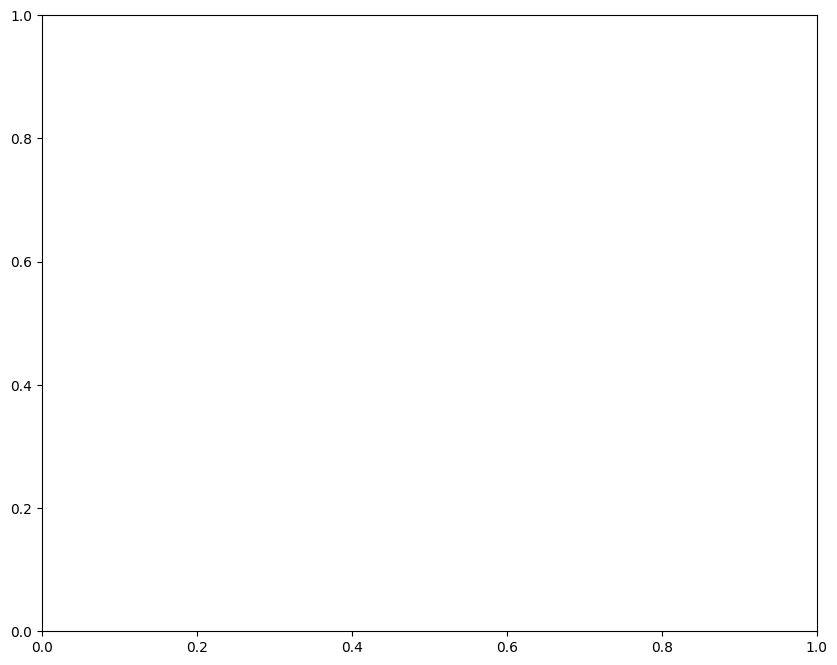

In [1]:
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
import cv2
import numpy as np
from tqdm import tqdm
import imageio

def create_skeleton_animation(fig, ax):
    # Set up the video properties
    width, height = 1920, 1080
    fps = 25
    output_filename = r"C:\\Users\\benjq\\OneDrive\\Bureau\\Stage\\For Benjamin\\For Benjamin\\Animation\\P0005_Skeleton.mp4"

    background_clip = cv2.VideoCapture("D:\\Babies_video\\P0005 Fidgety Video.mp4")

    skeleton = paths_88on11_edited
    ax.invert_yaxis()

    # Calculate the total number of frames
    total_frames = min(background_clip.get(cv2.CAP_PROP_FRAME_COUNT), skeleton['HEAD_X'].shape[1])

    # Set macro_block_size to 1 to disable resizing warning
    imageio.plugins.ffmpeg.macro_block_size = 1

    def animate(frame):
        _, background_frame = background_clip.read()

        if background_frame is None:
            return

        background_frame = cv2.cvtColor(background_frame, cv2.COLOR_BGR2RGB)

        ax.clear()  # Clear the plot

        # Calculate the corresponding frame index in the skeleton data
        skeleton_frame_index = int(frame * skeleton['HEAD_X'].shape[1] / total_frames)

        # Draw the background image without resizing
        ax.imshow(background_frame, aspect='auto', extent=(0, width, 0, height), interpolation='none')

        # Draw the skeleton lines on the plot
        x_shift = 0  # Adjust this value to change the horizontal shift
        y_shift = 0  # Adjust this value to change the vertical shift
        ax.plot(skeleton['HEAD_X'][:, skeleton_frame_index] + x_shift, -skeleton['HEAD_Y'][:, skeleton_frame_index] + height + y_shift, 'o-', alpha=0.5)
        ax.plot(skeleton['R_ARM_X'][:, skeleton_frame_index] + x_shift, -skeleton['R_ARM_Y'][:, skeleton_frame_index] + height + y_shift, 'o-', alpha=0.5)
        ax.plot(skeleton['L_ARM_X'][:, skeleton_frame_index] + x_shift, -skeleton['L_ARM_Y'][:, skeleton_frame_index] + height + y_shift, 'o-', alpha=0.5)
        ax.plot(skeleton['TORSO_X'][:, skeleton_frame_index] + x_shift, -skeleton['TORSO_Y'][:, skeleton_frame_index] + height + y_shift, 'o-', alpha=0.5)
        ax.plot(skeleton['L_LEG_X'][:, skeleton_frame_index] + x_shift, -skeleton['L_LEG_Y'][:, skeleton_frame_index] + height + y_shift, 'o-', alpha=0.5)
        ax.plot(skeleton['R_LEG_X'][:, skeleton_frame_index] + x_shift, -skeleton['R_LEG_Y'][:, skeleton_frame_index] + height + y_shift, 'o-', alpha=0.5)

    # Create the animation
    animation = FuncAnimation(fig, animate, frames=total_frames, interval=200, blit=False, repeat=False)

    # Create a list to store the frames
    frames = []

    # Render the animation and store the frames
    for frame in tqdm(range(total_frames), desc="Processing Frames", unit="frame"):
        animate(frame)
        fig.canvas.draw()

        # Convert the plot to an image array
        image = np.array(fig.canvas.renderer._renderer)
        frames.append(image)

    # Save the frames as a video using imageio
    with imageio.get_writer(output_filename, fps=fps) as writer:
        for frame in frames:
            writer.append_data(frame)

    # Release the resources
    plt.close(fig)
    background_clip.release()

    print("Skeleton animation created and saved successfully!")

# Set up the figure and axes outside the function
fig, ax = plt.subplots(1, 1, figsize=(10, 8))

# Call the function to create and save the skeleton animation
create_skeleton_animation(fig, ax)


# Compare the result

# this code just pute two video next to each other 


In [41]:
import cv2
import os

def combine_videos(video1_path, video2_path, output_filename):
    cap1 = cv2.VideoCapture(video1_path)
    cap2 = cv2.VideoCapture(video2_path)

    # Get video properties from the first video
    frame_width = int(cap1.get(cv2.CAP_PROP_FRAME_WIDTH))
    frame_height = int(cap1.get(cv2.CAP_PROP_FRAME_HEIGHT))
    fps = cap1.get(cv2.CAP_PROP_FPS)

    # Create VideoWriter object to save the output video
    output_path = os.path.join(os.getcwd(), output_filename + '.mp4')
    fourcc = cv2.VideoWriter_fourcc(*'FFV1')
    out = cv2.VideoWriter(output_path, fourcc, fps, (frame_width * 2, frame_height), isColor=False)

    while cap1.isOpened() and cap2.isOpened():
        ret1, frame1 = cap1.read()
        ret2, frame2 = cap2.read()

        if ret1 and ret2:
            frame1 = cv2.resize(frame1, (frame_width, frame_height))
            frame2 = cv2.resize(frame2, (frame_width, frame_height))
            frame = cv2.hconcat([frame1, frame2])  # Concatenate frames horizontally

            out.write(frame)  # Write the frame to the output video

            cv2.imshow('Combined Video', frame)

            if cv2.waitKey(25) & 0xFF == ord('q'):
                break
        else:
            break

    # Release resources
    cap1.release()
    cap2.release()
    out.release()
    cv2.destroyAllWindows()

# Provide the paths of the two videos and the desired output filename
video1_path = 'C:\\Users\\benjq\\OneDrive\\Bureau\\Stage\\For Benjamin\\For Benjamin\\Animation\\P0054_Skeleton.mp4'
video2_path = 'D:\\Babies_video\\P0054 Fidgety VideoDLC_resnet152_Waikato DHB 24MS-P3May18shuffle1_700000_labeled.mp4'
output_filename = 'C:\\Users\\benjq\\OneDrive\\Bureau\\Stage\\For Benjamin\\For Benjamin\\Animation\\Combinated_video_baby_0054'

combine_videos(video1_path, video2_path, output_filename)

